<div style="background-color:#3b5998; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>PUBG FINISH PLACEMENT ANALYSIS 🎮</b></h1>
</div>

<div style="background-color:#ffffff; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <img src="https://media.tenor.com/J5rQOVJMqwIAAAAd/pubg-pubg-mobile-lite.gif" alt="Animated GIF">
</div>

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [1]:
!pip3 install -q seaborn xgboost scikit-learn

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy   as np                    
import pandas  as pd                   
import seaborn as sns          
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from sklearn.preprocessing   import Normalizer
import base64
import warnings
from IPython.display import display, HTML
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')
print('There are {} rows and {} columns in our dataset.'.format(train.shape[0],train.shape[1]))

There are 4446966 rows and 29 columns in our dataset.


<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>DATA PREPARATION / EDA</b></h2>
</div>

In [4]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

### **For better understanding of database below there is a columns descriptions:**
### **Feature Cols**:
*     **groupId** - Players team ID
*     **matchId** - Match ID
*     **assists** - Number of assisted kills. The killed is actually scored for the another teammate.
*     **boosts** - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
*     **damageDealt** - Damage dealt to the enemy
*     **DBNOs** - Down But No Out - when you lose all your HP but you're not killed yet. All you can do is only to crawl.
*     **headshotKills** - Number of enemies killed with a headshot
*     **heals** - Number of healing items used by a player. These are for example: bandages, first-aid kits
*     **killPlace** - Ranking in a match based on kills.
*     **killPoints** - Ranking in a match based on kills points.
*     **kills** - Number of enemy players killed.
*     **killStreaks** - Max number of enemy players killed in a short amount of time.
*     **longestKill** - Longest distance between player and killed enemy.
*     **matchDuration** - Duration of a mach in seconds.
*     **matchType** - Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.
*     **maxPlace** - The worst place we in the match.
*     **numGroups** - Number of groups (teams) in the match.
*     **revives** - Number of times this player revived teammates.
*     **rideDistance** - Total distance traveled in vehicles measured in meters.
*     **roadKills** - Number of kills from a car, bike, boat, etc.
*     **swimDistance** - Total distance traveled by swimming (in meters).
*     **teamKills** - Number teammate kills (due to friendly fire).
*     **vehicleDestroys** - Number of vehicles destroyed.
*     **walkDistance** - Total distance traveled on foot measured (in meters).
*     **weaponsAcquired** - Number of weapons picked up.
*     **winPoints** - Ranking in a match based on won matches.

### **Target col**:
*     **winPlacePerc** - Normalised placement (rank). The 1st place is 1 and the last one is 0.



In [6]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


Now, let's check if there are any missing data.

In [7]:
missing_data = train.isna().sum().to_frame()
missing_data.columns=["Missing data"]

In [8]:
no_matches = train.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(no_matches))

There are 47965 matches registered in our database.


In [9]:
m_types = train.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


In PUBG there are essentially three main modes of game: **Solo**, **Duo** and **Squad**. 

In a squad mode, you play in a group of 4 players. Here we can see that the match types are further broken down taking into account view modes:
* FPP - First Person Perspective
* TPP - Thirst Peron Perspective
* Normal - you can switch between views during a game
However, I am not able to identify what flare- and crash- types of matches are.


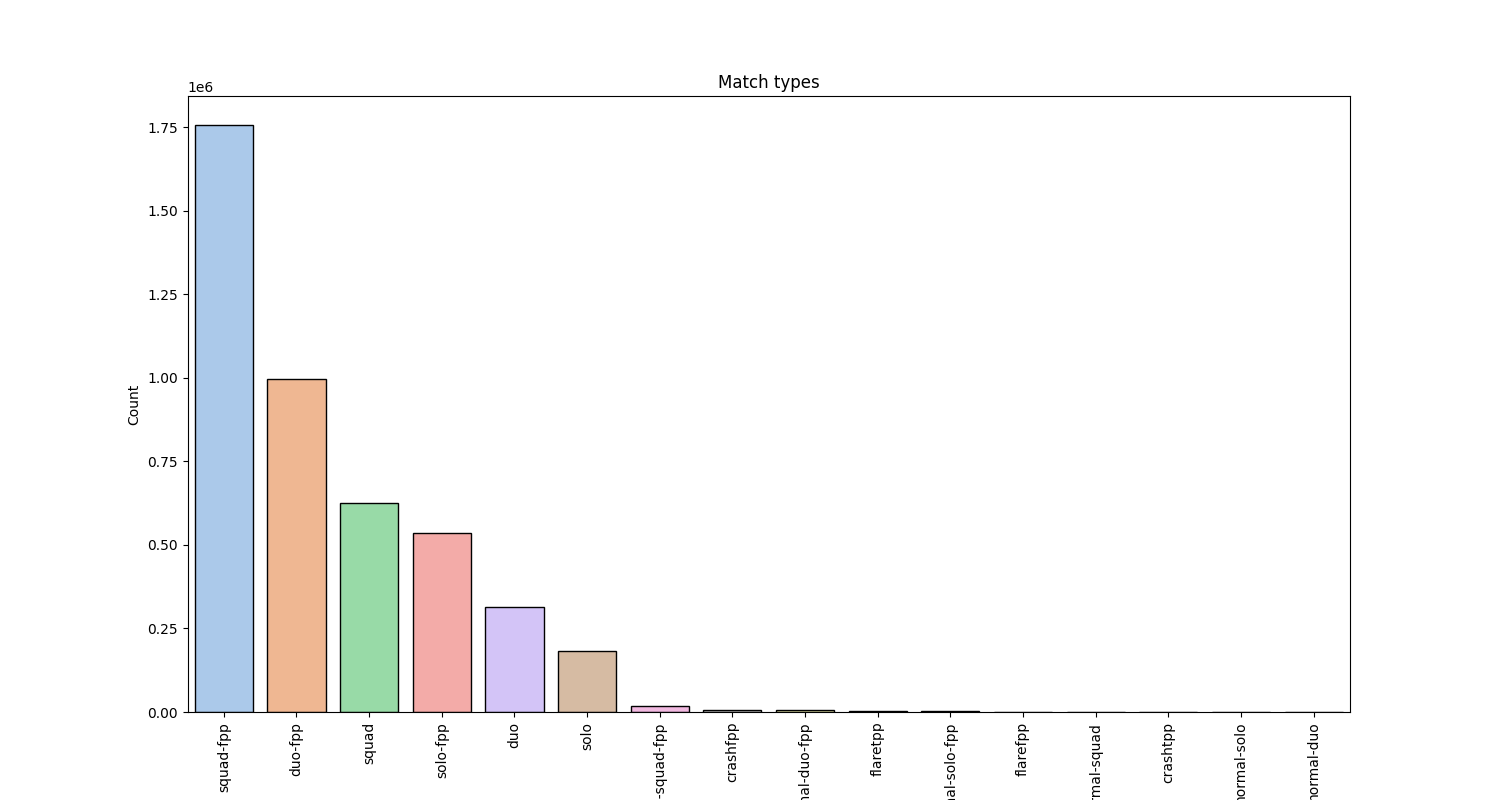

In [10]:
plt.figure(figsize=(15, 8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type", y="Count", data=m_types, palette="pastel")
for container in ax.containers:
    for bar in container:
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
        bar.set_zorder(1)

ax.set_xticklabels(ticks, rotation=90, fontsize=10)
ax.set_title("Match types")
plt.xlabel("Match Type")
plt.ylabel("Count")

plt.savefig('output_bar.png')
plt.close()
with open("output_bar.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

The graph above shows that the most popular game modes are squad and duo. Next I will aggregate all these individual types into three main categories (squad, duo and solo).

In [11]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [12]:
m_types2 = train["matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp", "squad", "normal-squad-fpp", "normal-squad"], :].sum()
aggregated_duos = m_types2.loc[["duo-fpp", "duo", "normal-duo-fpp", "normal-duo"], :].sum()
aggregated_solo = m_types2.loc[["solo-fpp", "solo", "normal-solo-fpp", "normal-solo"], :].sum()
aggregated_mt = pd.DataFrame([aggregated_squads, aggregated_duos, aggregated_solo],
                             index=["squad", "duo", "solo"],
                             columns=["count"])
aggregated_mt

,count
squad,2400402
duo,1315970
solo,720713



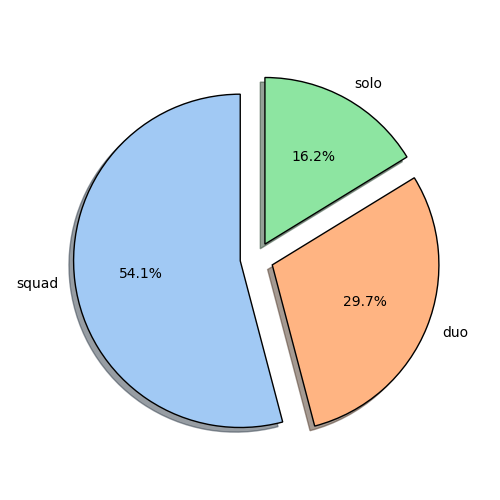

In [13]:
pastel_palette = sns.color_palette("pastel")
labels = ['squad', 'duo', 'solo']
colors = pastel_palette[:len(labels)]
fig1, ax1 = plt.subplots(figsize=(5, 5))
explode = [0.1, 0.1, 0.1]
wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],
                                   labels=labels,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=colors,  
                                   wedgeprops=wedgeprops,
                                   explode=explode,
                                   shadow=True)
for w in wedges:
    w.set_edgecolor('black')
    w.set_linewidth(1)
ax1.axis('equal')
plt.setp(autotexts, size=10)
plt.savefig('output_pie.png')
plt.close()
with open("output_pie.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

The pie chart above shows that over 54% of all the matches was played in squad mode.


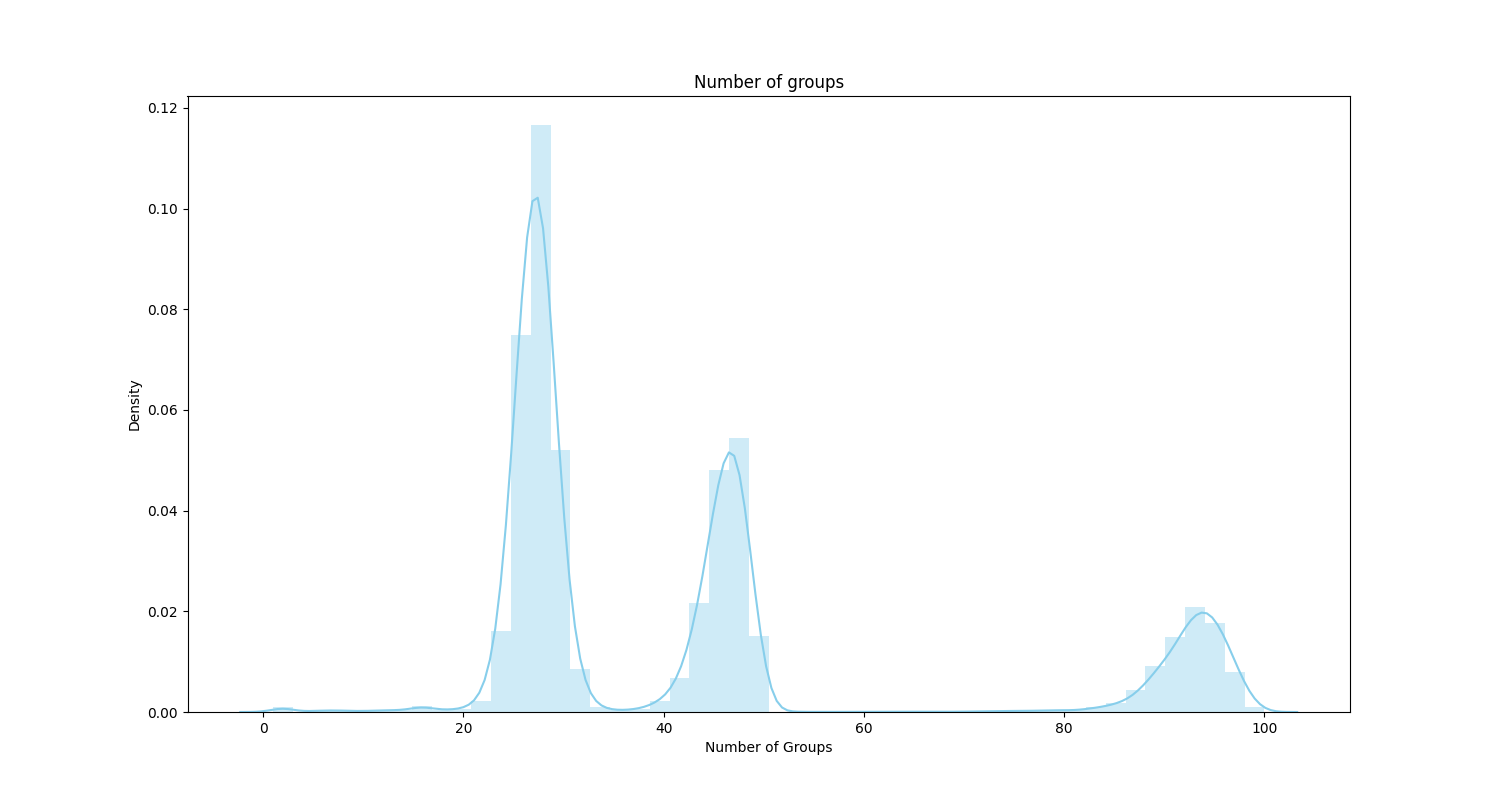

In [14]:
plt.figure(figsize=(15, 8))
ax = sns.distplot(train["numGroups"], color='skyblue')
ax.set_title("Number of groups")
plt.xlabel("Number of Groups")
plt.ylabel("Density")
plt.savefig('output_distplot.png')
plt.close()
with open("output_distplot.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

The graph allows to clearly notice distribution three spikes referring (from left) to: squad games, duo games and solo games.


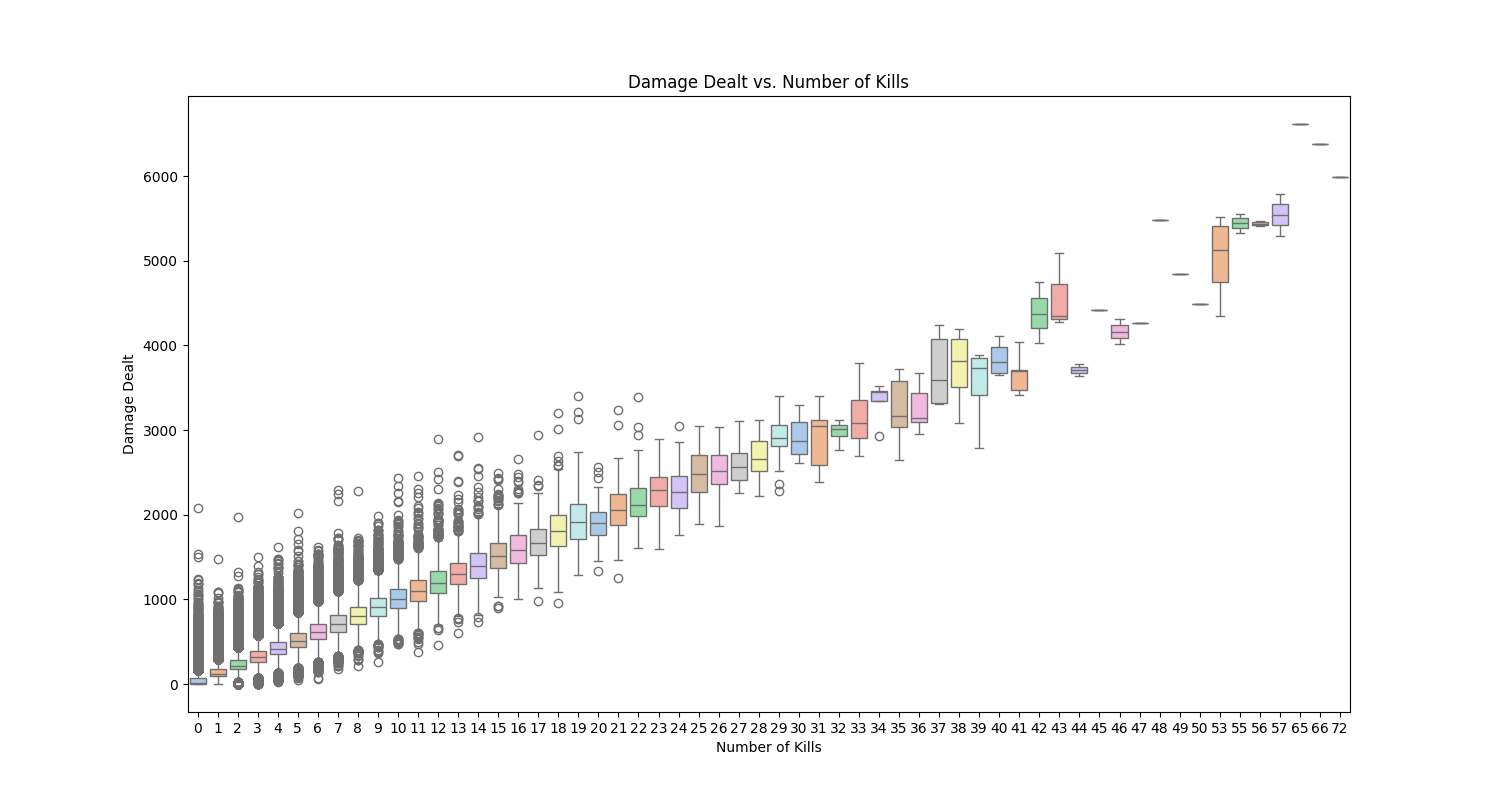

In [15]:
plt.figure(figsize=(15, 8))
ax1 = sns.boxplot(x="kills", y="damageDealt", data=train, palette="pastel")
ax1.set_title("Damage Dealt vs. Number of Kills")
plt.xlabel("Number of Kills")
plt.ylabel("Damage Dealt")
plt.savefig('output_boxplot.png')
plt.close()
with open("output_boxplot.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

There is an obvious correlation between number of kills and damage dealt. We see also that there are some outliers, more in the lower range. As the number of kills increases number of outliers reduces - these players rather kill than wound enemies. The maximum kills is 72 which is much bigger than the wast majority of players scores.
Let's look at our kills masters:


In [16]:
train[train['kills']>60][["Id","assists","damageDealt","headshotKills","kills","longestKill"]]

,Id,assists,damageDealt,headshotKills,kills,longestKill
334400,810f2379261545,20,6616.0,13,65,73.90
1248348,80ac0bbf58bfaf,5,6375.0,21,66,319.90
3431247,06308c988bf0c2,7,5990.0,64,72,78.23


Now let's see at headshoots statistics as this is one of the most satisfying thing you can score during a game. Players without any headshoot kills are filtered out.

In [17]:
headshots = train[train['headshotKills']>0]
print("Maximum number of headshots that the player scored: " + str(train["headshotKills"].max()));

Maximum number of headshots that the player scored: 64


DBNO - Down But Not Out. How many enemies DBNOs an average player scores.

In [18]:
headshots = train[train['DBNOs']>0]
print("Mean number of DBNOs that the player scored: " + str(train["DBNOs"].mean()))

Mean number of DBNOs that the player scored: 0.6578755043326169



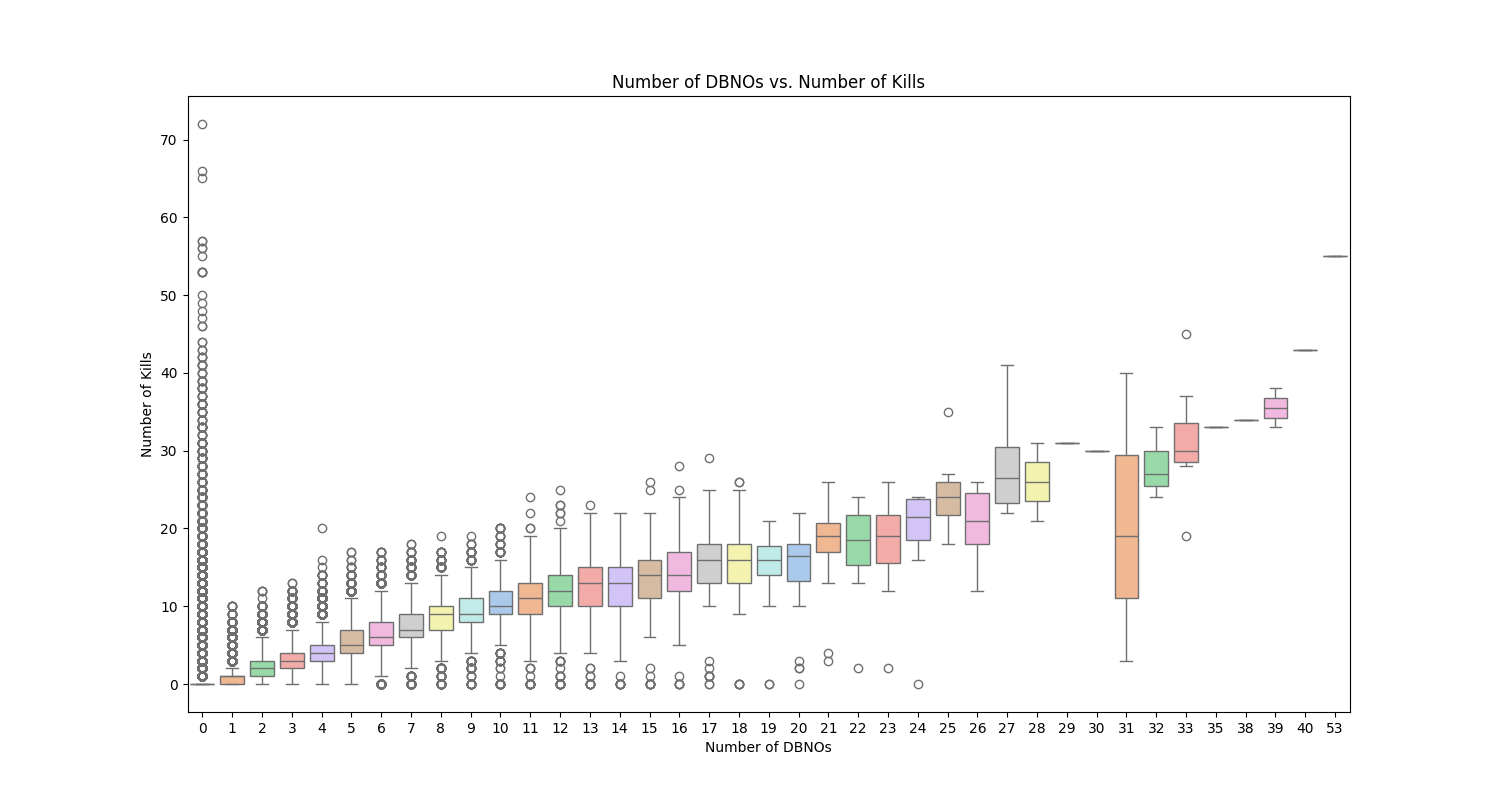

In [19]:
plt.figure(figsize=(15, 8))
pastel_palette = sns.color_palette("pastel")
ax2 = sns.boxplot(x="DBNOs", y="kills", data=train, palette=pastel_palette)
ax2.set_title("Number of DBNOs vs. Number of Kills")
plt.xlabel("Number of DBNOs")
plt.ylabel("Number of Kills")
plt.savefig('output_box.png')
plt.close()
with open("output_box.png", "rb") as img_file:
    img_data = img_file.read()
img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

It seems that DBNOs are correlated with kills. That makes sense as usually if player is not killed by headshoot yu have to finish him while he's in DBNO state. Interesting is the first observation in the plot - apparently there is a number of players who scored a kill without DBNOs - this is usually a headshot or a vechicle explosion.


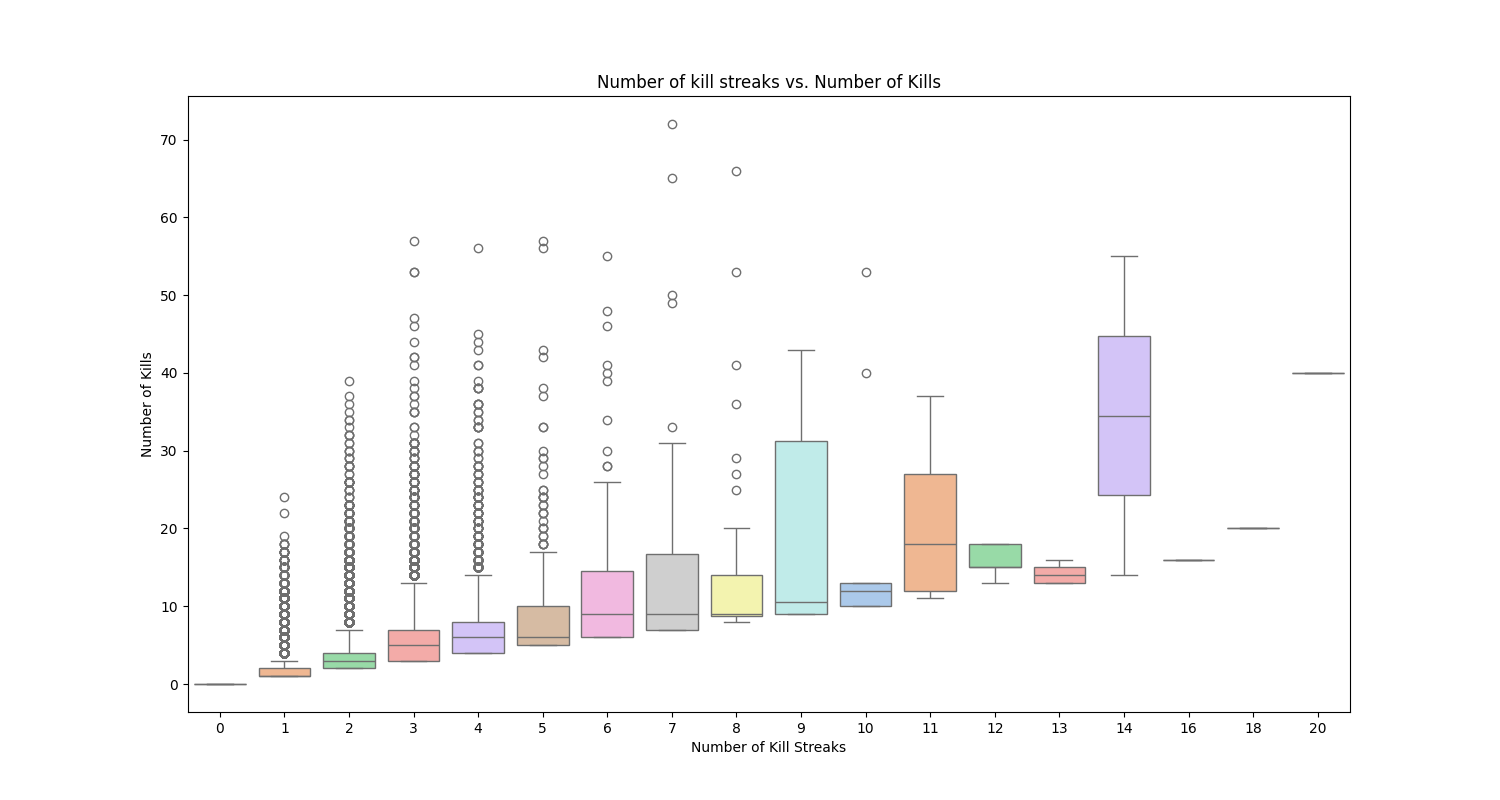

In [20]:
plt.figure(figsize=(15, 8))
pastel_palette = sns.color_palette("pastel")
ax3 = sns.boxplot(x="killStreaks", y="kills", data=train, palette=pastel_palette)
ax3.set_title("Number of kill streaks vs. Number of Kills")
plt.xlabel("Number of Kill Streaks")
plt.ylabel("Number of Kills")
plt.savefig('output_box2.png')
plt.close()
with open("output_box2.png", "rb") as img_file:
    img_data = img_file.read()
img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

Range is filtered to a resonable kill distance, e.g. 200 meters. To give you the feeling about distances in the game I prepared a small comparison in the picture below. On the left side the building I'm aiming at is approximately 100m away, on the right side around 200m.

![Imgur](https://i.imgur.com/js8kQpU.jpg)


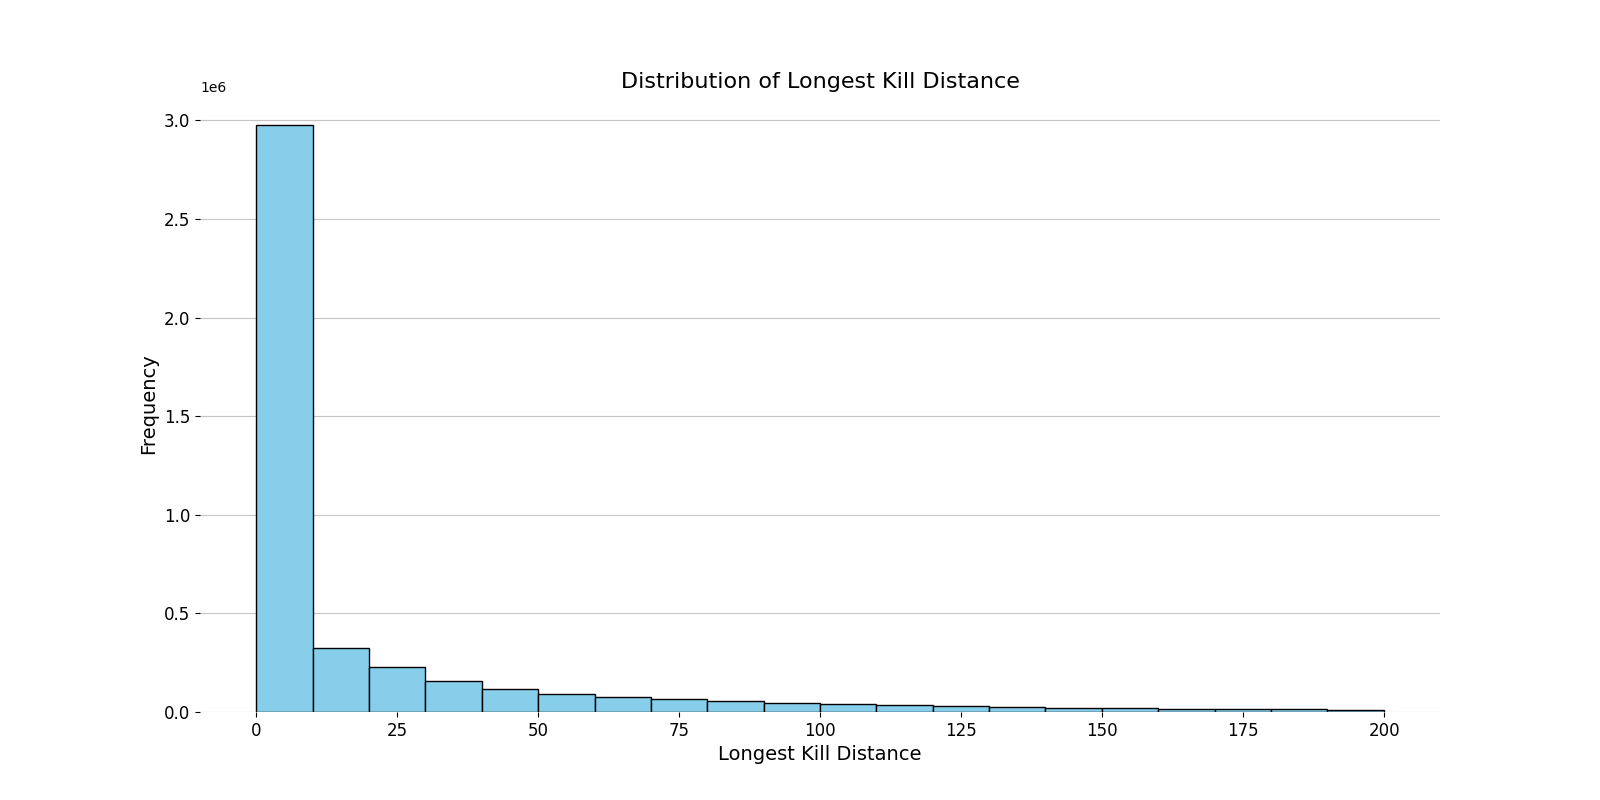

<Figure size 1600x800 with 0 Axes>

In [21]:
plt.figure(figsize=(16, 8))
dist = train[train['longestKill'] < 200]
plt.rcParams['axes.axisbelow'] = True
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist('longestKill', data=dist, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Longest Kill Distance", fontsize=16)
plt.xlabel("Longest Kill Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for _, spine in ax.spines.items():
    spine.set_visible(False)
plt.savefig('output_histogram.png')
plt.close()
with open("output_histogram.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

In [22]:
print("Average longest kill distance a player achieve is {:.1f}m, 95% of them not more than {:.1f}m and a maximum distance is {:.1f}m." .format(train['longestKill'].mean(),train['longestKill'].quantile(0.95),train['longestKill'].max()))

Average longest kill distance a player achieve is 23.0m, 95% of them not more than 126.1m and a maximum distance is 1094.0m.


Longest kill of 1094m seems a bit unrealistic (cheater?) but from another side with a 8x scope, a static target, very good position and a lot of luck it is possible.
To get a scale the entire Miramar map is 8x8km and 1300 meters is about like shooting from La Bendita crater to Impala city. Below the picture showing this in practice.
![Imgur](https://i.imgur.com/7WzRzkQ.jpg)

In [23]:
walk0 = train["walkDistance"] == 0
ride0 = train["rideDistance"] == 0
swim0 = train["swimDistance"] == 0
print("{} of players didn't walk at all, {} players didn't drive and {} didn't swim." .format(walk0.sum(),ride0.sum(),swim0.sum()))

99603 of players didn't walk at all, 3309429 players didn't drive and 4157694 didn't swim.


Above numbers indicate that there is a significant number of players who didn't walk at all. We should think how to interpret these record. It is obvious that you have to walk just a little bit in order to play this game (to get to a car at least). Are this disconnected players? If yes they shouldn't score any points. Let's check this.

Average place of non-walking players is 0.044, minimum is 0.0, the best is 1.0, 95% of players have a score below 0.25.



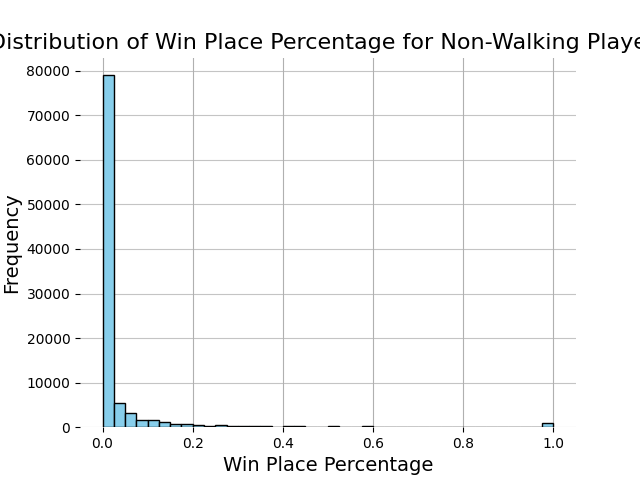

<Figure size 1500x1000 with 0 Axes>

In [24]:
walk0_rows = train[walk0]
average_place = walk0_rows["winPlacePerc"].mean()
minimum_place = walk0_rows["winPlacePerc"].min()
maximum_place = walk0_rows["winPlacePerc"].max()
quantile_95 = walk0_rows["winPlacePerc"].quantile(0.95)
print("Average place of non-walking players is {:.3f}, minimum is {}, the best is {}, 95% of players have a score below {}." 
      .format(average_place, minimum_place, maximum_place, quantile_95))
plt.figure(figsize=(15,10))
walk0_rows.hist('winPlacePerc', bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Win Place Percentage for Non-Walking Players", fontsize=16)
plt.xlabel("Win Place Percentage", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(False)

plt.savefig('output_walk0_histogram.png')
plt.close()
with open("output_walk0_histogram.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

As we see most of the non-walking players score only last places. However, few of them got better places and a few even the top ones. This may be indication of presence of famous **cheaters**! Let's print couple of suspicious row.

In [25]:
suspects = train.query('winPlacePerc ==1 & walkDistance ==0').head()
suspects.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.0000,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,3,0,1.0
8790,106afdb574db25,4b0ae4659e9936,cf0cb51c829eb5,0,0,0.0000,0,0,0,2,...,0,0.0,0,0.0,0,0,0.0,1,0,1.0
9264,0351565a7058e9,3663a93a319725,3659fe3694262a,0,0,0.3218,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,9,0,1.0
18426,e6d6f94558dd2f,22818b9a9a6159,486200c5613f14,0,1,0.0000,0,0,0,2,...,0,0.0,0,0.0,0,0,0.0,6,0,1.0
19054,d0683f5d780f09,faebf5c484de4a,ec9a90395ed8c0,0,0,99.0000,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,9,0,1.0


In [26]:
print("Maximum ride distance for suspected entries is {:.3f} meters, and swim distance is {:.1f} meters." .format(suspects["rideDistance"].max(), suspects["swimDistance"].max()))

Maximum ride distance for suspected entries is 0.000 meters, and swim distance is 0.0 meters.


Interestingly, all of the columns connected to travelling are zero.


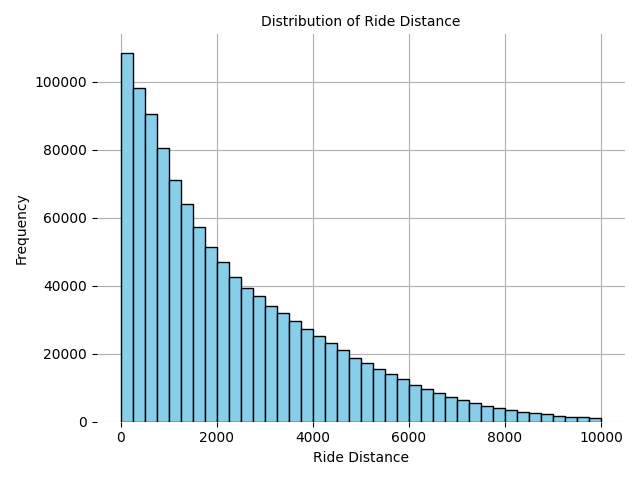
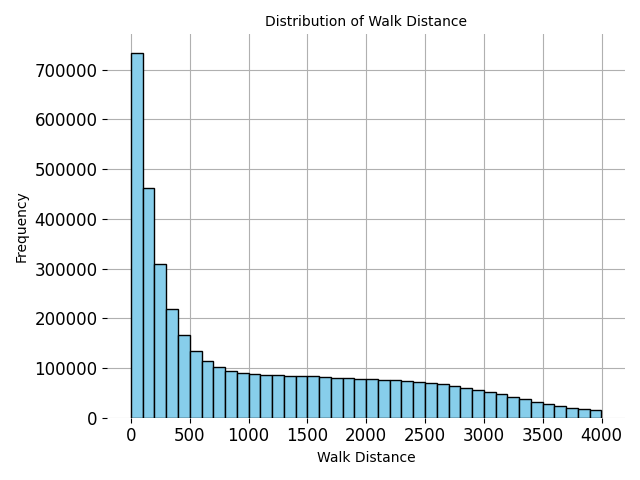

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [27]:
ride = train.query('rideDistance > 0 & rideDistance < 10000')
walk = train.query('walkDistance > 0 & walkDistance < 4000')

plt.figure(figsize=(15, 10))
ride.hist('rideDistance', bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Ride Distance", fontsize=10)
plt.xlabel("Ride Distance", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax1 = plt.gca()
for _, spine in ax1.spines.items():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('output_ride_distance_histogram.png')
plt.close()
with open("output_ride_distance_histogram.png", "rb") as img_file:
    img_data_ride = img_file.read()

img_base64_ride = base64.b64encode(img_data_ride).decode("utf-8")

plt.figure(figsize=(15, 10))
walk.hist('walkDistance', bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Walk Distance", fontsize=10)
plt.xlabel("Walk Distance", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax2 = plt.gca()
for _, spine in ax2.spines.items():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('output_walk_distance_histogram.png')
plt.close()
with open("output_walk_distance_histogram.png", "rb") as img_file:
    img_data_walk = img_file.read()

img_base64_walk = base64.b64encode(img_data_walk).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <div style="display:inline-block; margin-right: 10px;">
        <img src="data:image/png;base64,{img_base64_ride}" style="display: block; margin: 0 auto;">
        <p style="text-align:center;">Ride Distance</p>
    </div>
    <div style="display:inline-block;">
        <img src="data:image/png;base64,{img_base64_walk}" style="display: block; margin: 0 auto;">
        <p style="text-align:center;">Walk Distance</p>
    </div>
</div>
'''
display(HTML(html_code))


Plots above show that players mostly walk during a game. That's obvious when you think that vehicles are usually used just to loot more locations and to get a more strategic positions for attack and defend.

Now let's create a sum of walking, driving and swimming distances for each row.


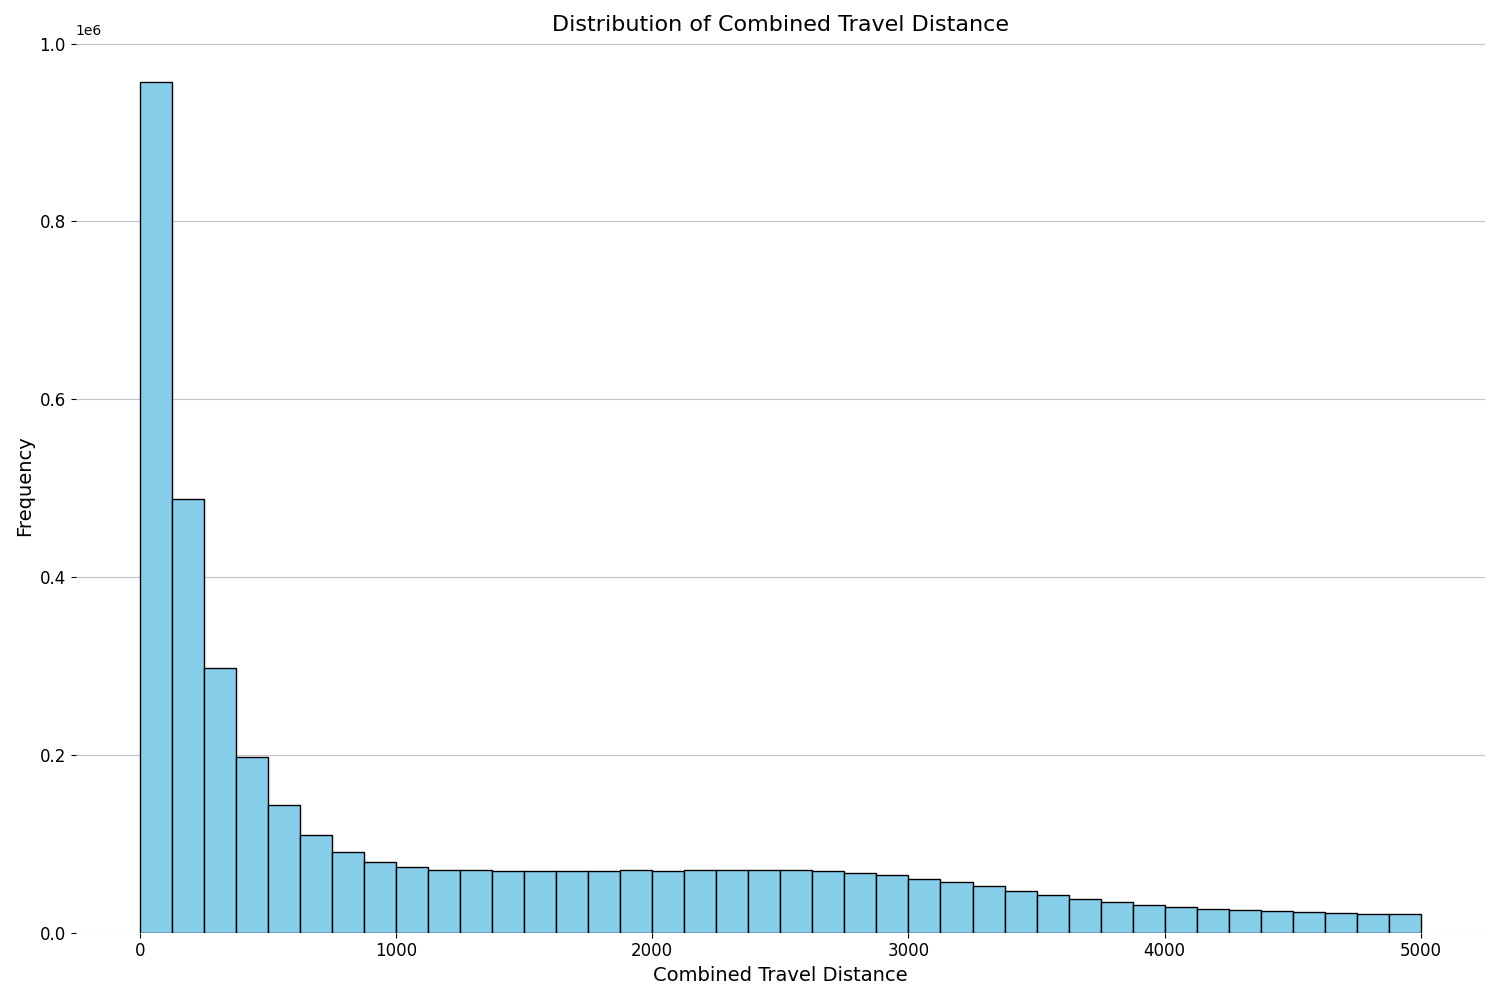

In [28]:
travel_dist = train["walkDistance"] + train["rideDistance"] + train["swimDistance"]
travel_dist = travel_dist[travel_dist < 5000]

plt.figure(figsize=(15, 10))
plt.hist(travel_dist, bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Combined Travel Distance", fontsize=16)
plt.xlabel("Combined Travel Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('output_combined_travel_distance_histogram.png')
plt.close()

with open("output_combined_travel_distance_histogram.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''

display(HTML(html_code))

Average number of acquired weapons is 3.660, minimum is 0 and the maximum 236, 99% of players acquired less than weapons 10.0.



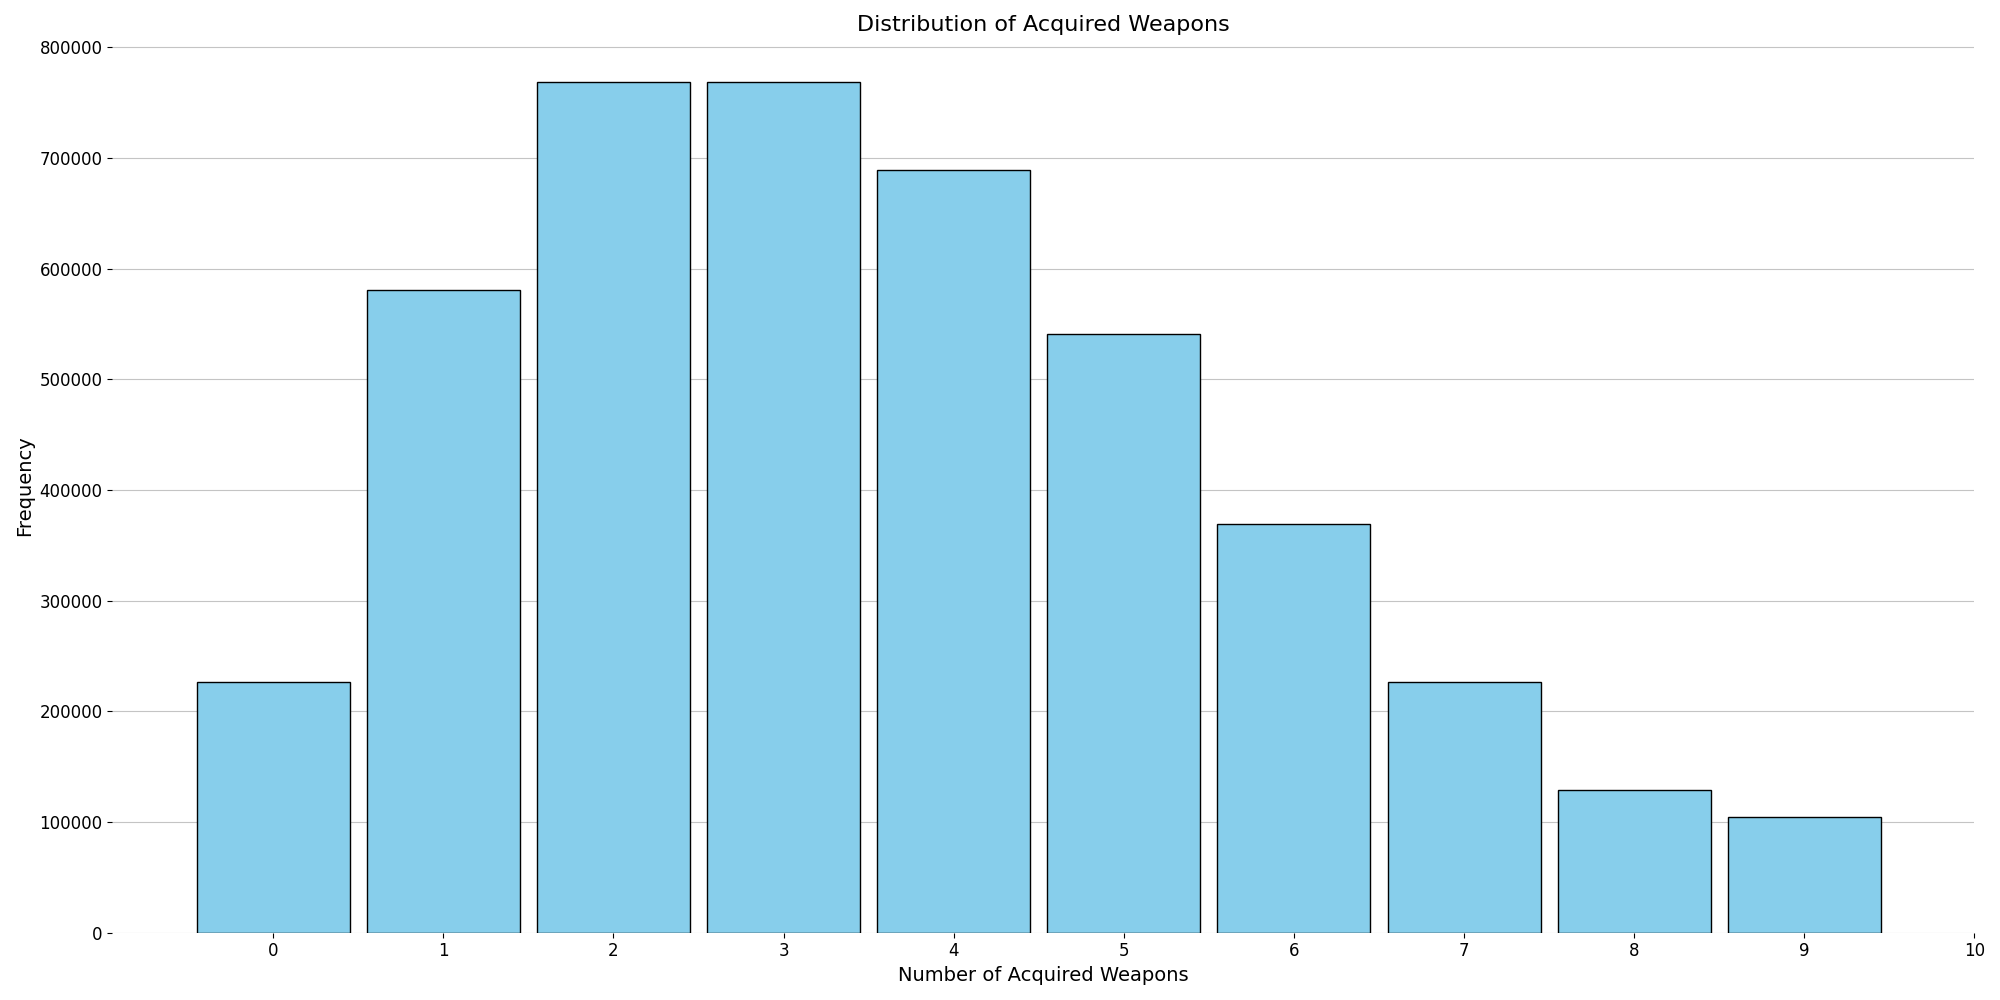

In [29]:
print("Average number of acquired weapons is {:.3f}, minimum is {} and the maximum {}, 99% of players acquired less than weapons {}." 
      .format(train["weaponsAcquired"].mean(), train["weaponsAcquired"].min(), train["weaponsAcquired"].max(), train["weaponsAcquired"].quantile(0.99)))

plt.figure(figsize=(20, 10))
plt.hist(train["weaponsAcquired"], bins=10, range=(0, 10), color='skyblue', edgecolor='black', align="left", rwidth=0.9)
plt.title("Distribution of Acquired Weapons", fontsize=16)
plt.xlabel("Number of Acquired Weapons", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(11), fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('output_weapons_acquired_histogram.png')
plt.close()

with open("output_weapons_acquired_histogram.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''

display(HTML(html_code))

In [30]:
top10 = train[train["winPlacePerc"]>0.9]
print("TOP 10% overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills." 
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

TOP 10% overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.



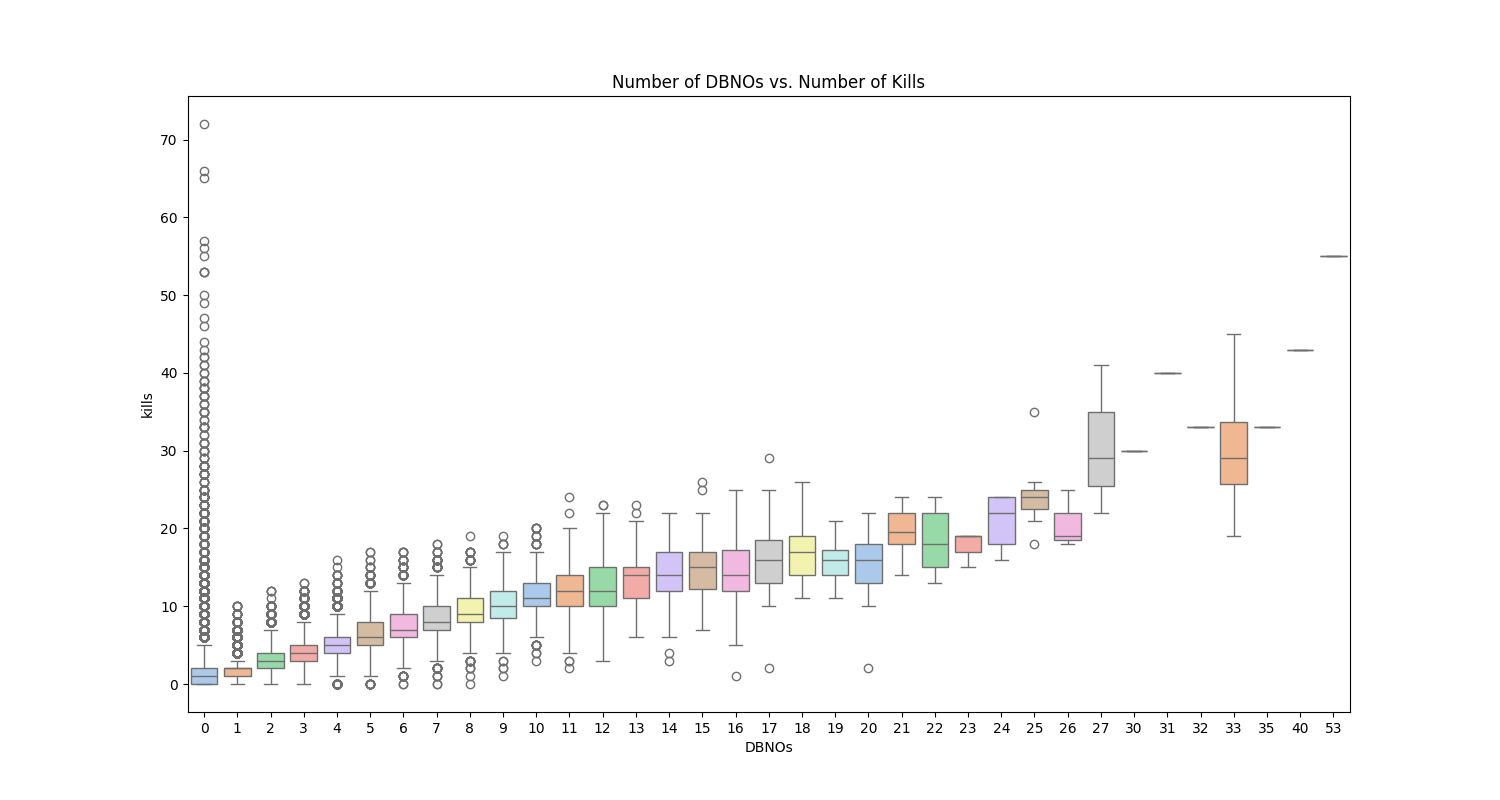

In [31]:
plt.figure(figsize=(15, 8))
ax3 = sns.boxplot(x="DBNOs", y="kills", data=top10,palette=pastel_palette)
ax3.set_title("Number of DBNOs vs. Number of Kills")
plt.savefig('output_dbno_kills_boxplot.png')
plt.close()
with open("output_dbno_kills_boxplot.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

Let's see their way of travelling and comare this to the overall population.

Average walking distance of top 10 players: 2813.5134925205934



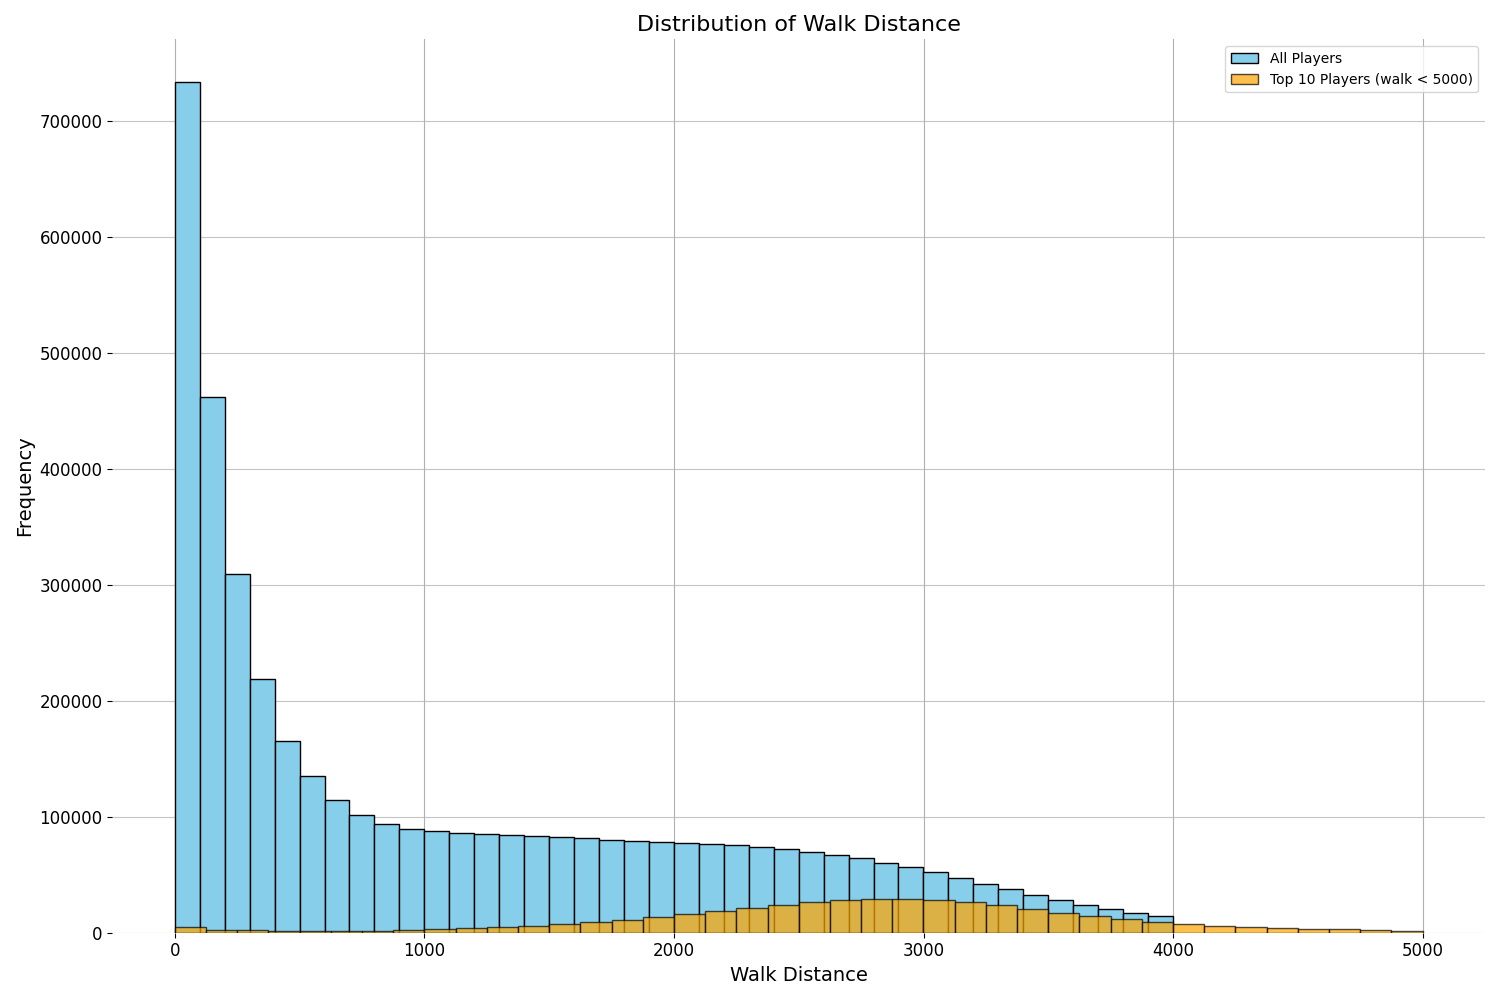

In [32]:
fig, ax1 = plt.subplots(figsize=(15, 10))
walk.hist('walkDistance', bins=40, figsize=(15, 10), ax=ax1, color='skyblue', edgecolor='black')
walk10 = top10[top10['walkDistance'] < 5000]
walk10.hist('walkDistance', bins=40, figsize=(15, 10), ax=ax1, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Walk Distance", fontsize=16)
plt.xlabel("Walk Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.legend(["All Players", "Top 10 Players (walk < 5000)"])
for _, spine in ax1.spines.items():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig('output_walk_distance_histograms.png')
plt.close()
average_walk_distance = top10['walkDistance'].mean()
print("Average walking distance of top 10 players:", average_walk_distance)
with open("output_walk_distance_histograms.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")

html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

Average riding distance of top 10 players: 1392.0857815081706



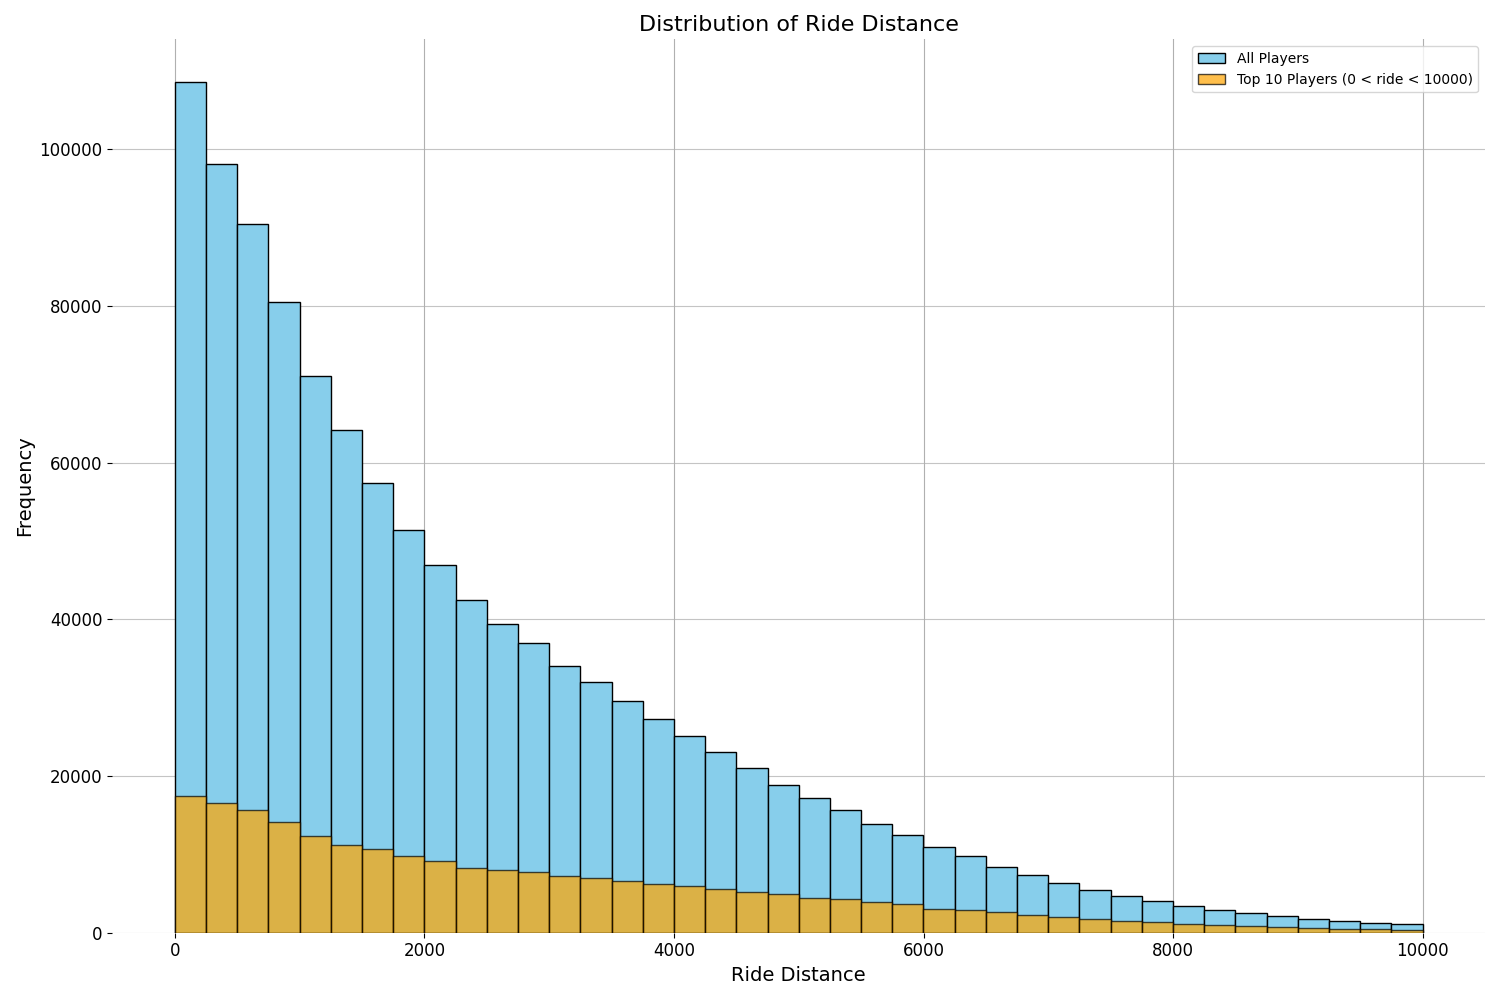

In [33]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ride.hist('rideDistance', bins=40, figsize=(15, 10), ax=ax1, color='skyblue', edgecolor='black')
ride10 = top10.query('rideDistance > 0 & rideDistance < 10000')
ride10.hist('rideDistance', bins=40, figsize=(15, 10), ax=ax1, color='orange', alpha=0.7, edgecolor='black')
plt.title("Distribution of Ride Distance", fontsize=16)
plt.xlabel("Ride Distance", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.legend(["All Players", "Top 10 Players (0 < ride < 10000)"])
for _, spine in ax1.spines.items():
    spine.set_visible(False)
plt.tight_layout()
plt.savefig('output_ride_distance_histograms.png')
plt.close()
average_ride_distance = top10['rideDistance'].mean()
print("Average riding distance of top 10 players:", average_ride_distance)
with open("output_ride_distance_histograms.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

What about the longest distances at which they scored their kills?

In [34]:
print("On average the best 10% of players have the longest kill at {:.3f} meters, and the best score is {:.1f} meters." .format(top10["longestKill"].mean(), top10["longestKill"].max()))

On average the best 10% of players have the longest kill at 75.048 meters, and the best score is 1094.0 meters.


<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>BUILD/TRAIN MODEL</b></h2>
</div>

In [35]:
train.dropna(subset=["winPlacePerc"], inplace=True)
X = train.drop(["Id","groupId","matchId","matchType","winPlacePerc"], axis=1)
y = train["winPlacePerc"]
col_names = X.columns
transformer = Normalizer().fit(X)
X = transformer.transform(X)

In [36]:
X = pd.DataFrame(X, columns=col_names)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [38]:
param = {
    'eta': 0.15, 
    'max_depth': 5,  
    'num_class': 2} 
steps = 20
model = xgb.train(param, D_train, steps)


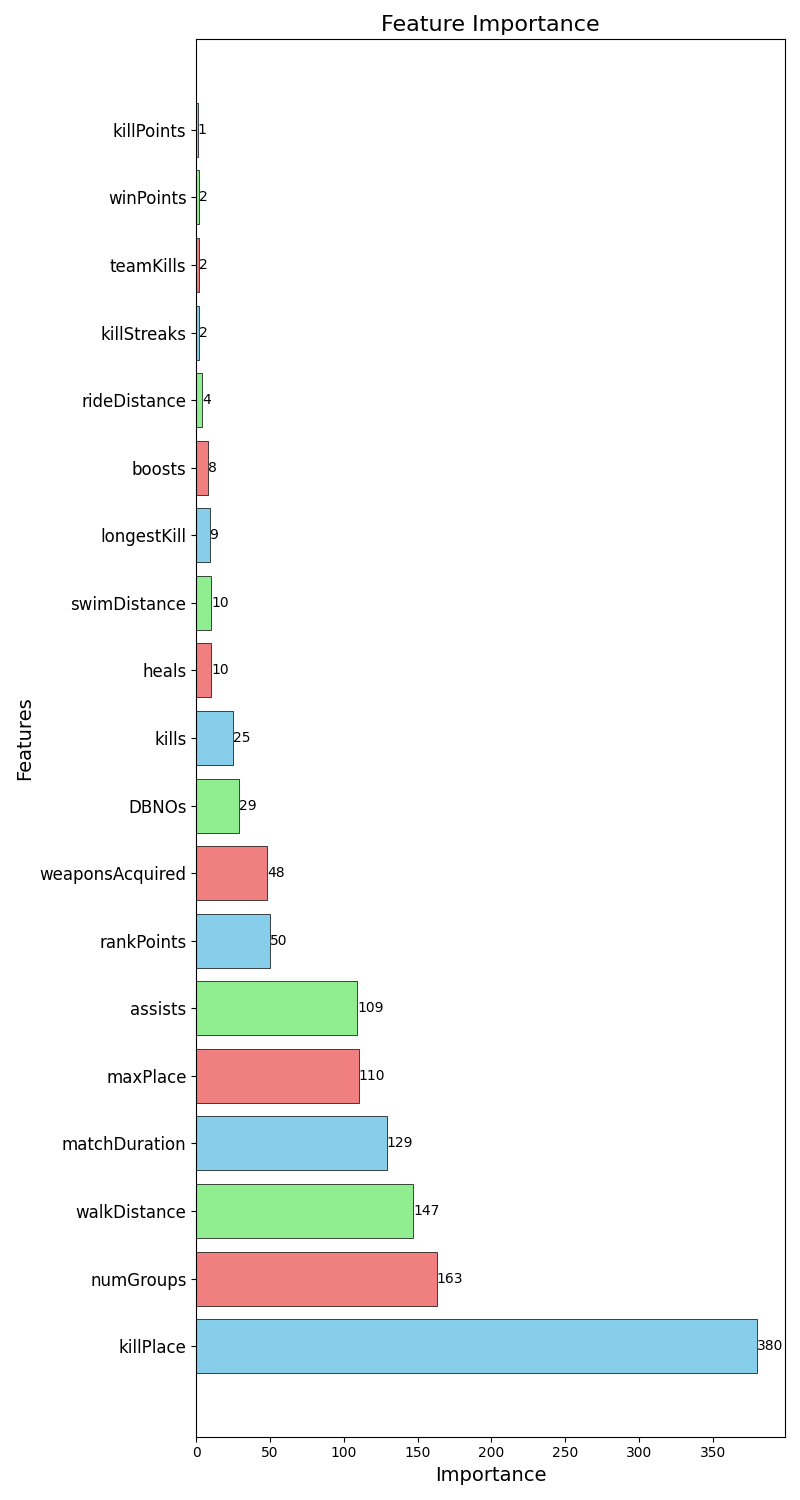

In [39]:
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
features = [x[0] for x in sorted_importance][:20]
importance_values = [x[1] for x in sorted_importance][:20]
fig, ax = plt.subplots(figsize=(8, 15))
bars = plt.barh(range(len(features)), importance_values, color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black', linewidth=0.5)
plt.yticks(range(len(features)), features, fontsize=12)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance", fontsize=16)
plt.tight_layout()
plt.savefig('output_feature_importance.png')
plt.close()
with open("output_feature_importance.png", "rb") as img_file:
    img_data = img_file.read()
img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:white; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

In [40]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print("MSE = {}".format(mean_squared_error(Y_test, best_preds)))

MSE = 0.3182464888230851
